In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df= pd.read_csv('/content/drive/MyDrive/PJ/csv/tipos/Persimmon.csv')

Mounted at /content/drive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cliente         2072 non-null   object 
 1   precio_venta    2053 non-null   float64
 2   peso            2072 non-null   float64
 3   t_id            2072 non-null   object 
 4   fecha_venta     2068 non-null   object 
 5   hora_venta      2068 non-null   object 
 6   tipo            2072 non-null   object 
 7   fecha_recogida  2072 non-null   object 
 8   hora_recogida   2072 non-null   object 
 9   lote            2072 non-null   object 
 10  marca           2072 non-null   object 
 11  coste_inicial   2008 non-null   float64
 12  proveedor       2072 non-null   object 
dtypes: float64(3), object(10)
memory usage: 210.6+ KB


In [ ]:
print(df.describe())

       precio_venta         peso  coste_inicial
count   2053.000000  2072.000000    2008.000000
mean       3.505570   301.128664       1.988447
std        0.711557    96.994605       0.510901
min        1.016347   -38.349181       0.323451
25%        3.023560   234.000294       1.654242
50%        3.501396   299.343532       1.966636
75%        3.973163   368.868694       2.307447
max        6.141032   625.778232       3.761036


In [ ]:
print(df.head())

         cliente  precio_venta        peso               t_id fecha_venta  \
0  CompraMaestra      3.654748  341.739687  Persimmon1007.png  2022/09/27   
1  CompraMaestra      3.383781  462.348315   Persimmon102.png  2022/09/03   
2  CompraMaestra      4.164245  325.413205  Persimmon1026.png  2022/09/21   
3  CompraMaestra      2.951784  201.540889  Persimmon1044.png  2022/09/05   
4  CompraMaestra      2.990685  305.421910  Persimmon1138.png  2022/09/15   

  hora_venta       tipo fecha_recogida hora_recogida  \
0      12:00  Persimmon     2022/09/27         04:00   
1      22:00  Persimmon     2022/09/03         16:00   
2      12:00  Persimmon     2022/09/21         06:00   
3      16:00  Persimmon     2022/09/05         10:00   
4      18:00  Persimmon     2022/09/15         14:00   

                        lote                marca  coste_inicial  \
0  V69B83O77S79T49L48S46V78M       FrescuraMágica       1.863534   
1   V69B83O77S79T49L50J80T71     SinfoníaDelicias       2.354494

In [ ]:
df['coste_inicial'] = df['coste_inicial'].round(2)
df['peso'] = df['peso'].round(2)
df['precio_venta'] = df['precio_venta'].round(2)

df.head()

# **PESO**

Empezamos analizando los PESOS

In [ ]:
peso_minimo = df["peso"].min()
peso_maximo = df["peso"].max()
negativos = df[df["peso"] < 0]
nulos = df[df["peso"].isnull()]

print(f"Peso mínimo: {peso_minimo}")
print(f"Peso máximo: {peso_maximo}")
print(f"Total negativos: {len(negativos)}")
print(f"Total nulos: {len(nulos)}")

Peso mínimo: -38.34918125935502
Peso máximo: 625.77823241071
Total negativos: 2
Total nulos: 0


In [ ]:
df[df["peso"] < 0]["marca"].value_counts()


,count
marca,
TropicalSabor,1
FantasíaDelicia,1


In [ ]:
df[df["peso"] < 0]["proveedor"].value_counts()

,count
proveedor,
Agrícola Solaris Energía,1
Apícola EcoMiel,1


In [ ]:
df[df["peso"] < 0]["lote"].unique()

array(['V69B83O77S79T50L49S46V78M', 'V69B83O77S79T52U46V78M'],
      dtype=object)

Revisamos si es una marca o proveedor en específico que tiene negativos pero resultan ser los lotes V69B83O77S79T.

In [ ]:
print(negativos["peso"])

289    -33.908597
1194   -38.349181
Name: peso, dtype: float64


Para la poca cantidad que son los eliminamos, no tienen sentido tampoco en positivo.

In [ ]:
filas_peso_negativo = df[df["peso"] < 0]
print(filas_peso_negativo)

                     cliente  precio_venta       peso               t_id  \
289           SuperEconómico      2.667387 -33.908597  Persimmon2017.png   
1194  Distribuciones del Sol      3.440285 -38.349181    Persimmon49.png   

     fecha_venta hora_venta       tipo fecha_recogida hora_recogida  \
289   2022/10/01      14:00  Persimmon     2022/10/01         04:00   
1194  2022/09/26      10:00  Persimmon     2022/09/26         05:00   

                           lote            marca  coste_inicial  \
289   V69B83O77S79T50L49S46V78M    TropicalSabor       1.356412   
1194     V69B83O77S79T52U46V78M  FantasíaDelicia       2.141838   

                     proveedor  
289   Agrícola Solaris Energía  
1194           Apícola EcoMiel  


Reemplazamos todos los valores negativos por NaN


In [ ]:
df["peso"] = df["peso"].mask(df["peso"] < 0)

In [ ]:
print("Cantidad de pesos mayores de 299 g:", len(df[df['peso'] > 299]))
print("Peso máximo:", df.loc[df['peso'] > 299, 'peso'].max())

Cantidad de pesos mayores de 299 g: 1038
Peso máximo: 625.77823241071


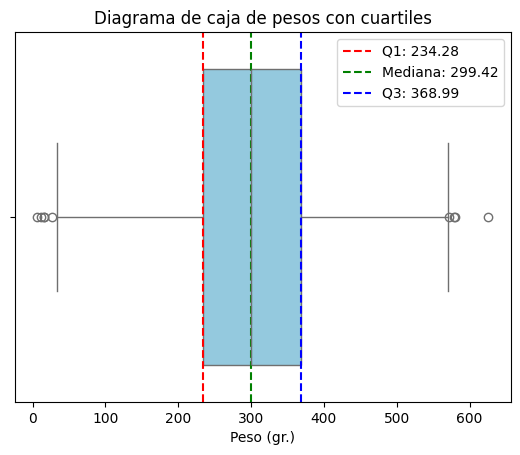

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["peso"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de pesos con cuartiles')
plt.xlabel('Peso (gr.)')
plt.legend()

plt.show()

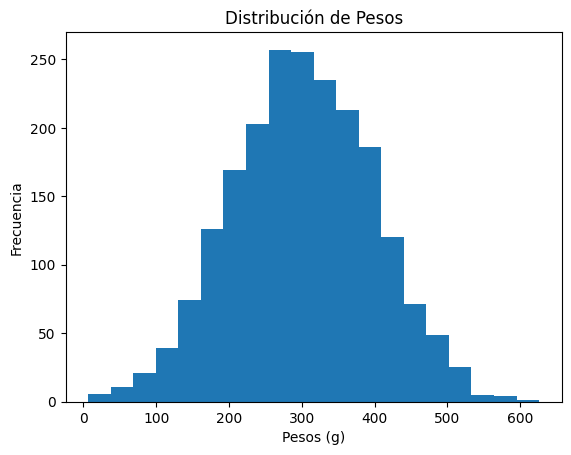

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["peso"].dropna(), bins=20)
plt.title('Distribución de Pesos')
plt.xlabel('Pesos (g)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
Q1_pe = df["peso"].quantile(0.25)
Q3_pe = df["peso"].quantile(0.75)
IQR_pe = Q3_pe - Q1_pe
outliers_pe = df[df["peso"] > Q3_pe + 1.5 * IQR_pe]

print("Total outliers:", outliers_pe["peso"].count())
print(Q1_pe)
print(Q3_pe)
print(IQR_pe)

Total outliers: 4
234.2776742895422
368.9909386401748
134.7132643506326


El peso medio de una unidad de persimmon esta entre los 150 y los 350 gr.

In [ ]:
print(df[['peso', 't_id']].dropna(subset=['peso']).sort_values(by='peso'))

            peso               t_id
984     6.678728   Persimmon971.png
1919   11.332449  Persimmon1810.png
876    15.380052  Persimmon1183.png
1063   15.968854  Persimmon1608.png
1530   26.476447   Persimmon652.png
...          ...                ...
1170  570.287299  Persimmon1287.png
710   572.460261  Persimmon1329.png
803   578.318014   Persimmon525.png
192   580.081535  Persimmon1027.png
842   625.778232  Persimmon1866.png

[2070 rows x 2 columns]


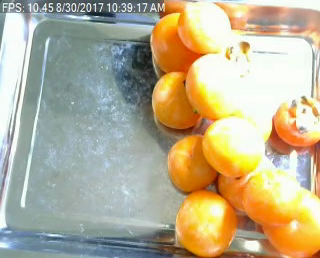

In [ ]:
from IPython.display import Image, display

image_path = '/content/drive/MyDrive/PJ/archive/Persimmon/Persimmon1608.png'

try:
    display(Image(filename=image_path))
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {image_path}. Por favor, verifica la ruta de tu imagen.")
except Exception as e:
    print(f"Ocurrió un error al cargar la imagen: {e}")

En la imagen anterior podemos ver muchos Persimmon y un peso de tan solo 15.968854 gr.

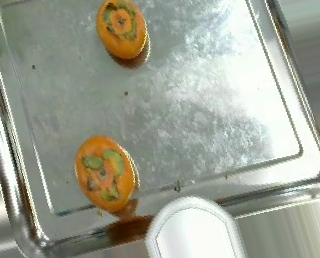

In [ ]:
from IPython.display import Image, display

image_path = '/content/drive/MyDrive/PJ/archive/Persimmon/Persimmon525.png'

try:
    display(Image(filename=image_path))
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {image_path}. Por favor, verifica la ruta de tu imagen.")
except Exception as e:
    print(f"Ocurrió un error al cargar la imagen: {e}")

En la segunda imagen vemos un peso de 578.318014 gr. y tan solo 2 Persimmon.

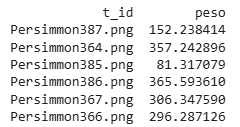

Las imagenes de la tabla tan solo contienen un persimmon.
Seguimos viendo imagenes inconsistentes con los datos de pesos.

Dejo los pesos aquí y veremos más adelante. Empiezo con coste inicial.


# **COSTE INICIAL**

In [ ]:
coste_inicial_min = df["coste_inicial"].min()
coste_inicial_max = df["coste_inicial"].max()
negativos_coste = df[df["coste_inicial"] < 0]
nulos_coste = df[df["coste_inicial"].isnull()]

print(f"Coste inicial mínimo: {coste_inicial_min}")
print(f"Coste inicial máximo: {coste_inicial_max}")
print(f"Coste inicial negativos: {len(negativos_coste)}")
print(f"Coste inicial nulos: {len(nulos_coste)}")

Coste inicial mínimo: 0.3234507031967903
Coste inicial máximo: 3.7610361728295536
Coste inicial negativos: 0
Coste inicial nulos: 64


No encontramos negativos y los costes iniciales van desde los 0.32 hasta los 3.76


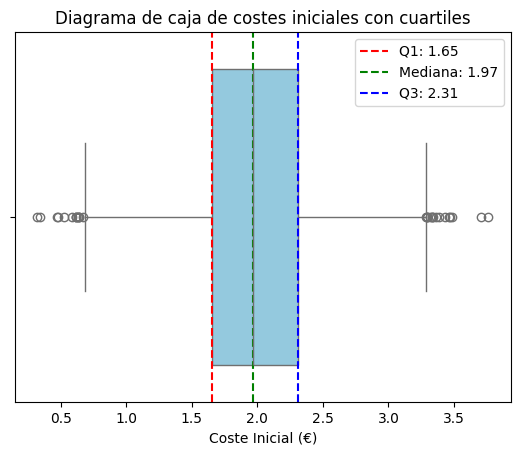

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["coste_inicial"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de costes iniciales con cuartiles')
plt.xlabel('Coste Inicial (€)')
plt.legend()

plt.show()

En el gráfico se ven muchos outliers. Vamos a ver en otro gráfico como visualizamos los datos.

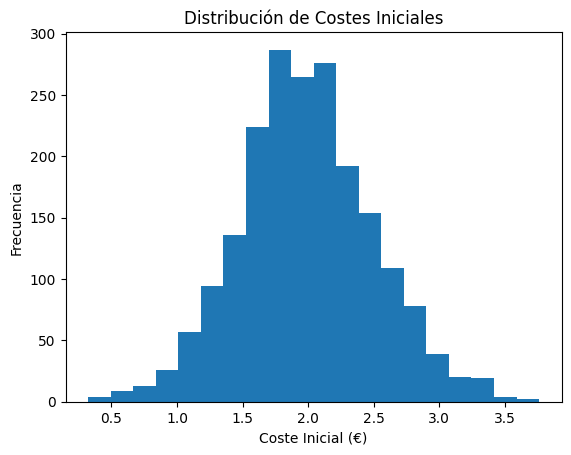

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["coste_inicial"].dropna(), bins=20)
plt.title('Distribución de Costes Iniciales')
plt.xlabel('Coste Inicial (€)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
Q1_ci = df["coste_inicial"].quantile(0.25)
Q3_ci = df["coste_inicial"].quantile(0.75)
IQR_ci = Q3_ci - Q1_ci
outliers_ci = df[df["coste_inicial"] > Q3_ci + 1.5 * IQR_ci]

print("Total outliers:", outliers_ci["coste_inicial"].count())
print(Q1_ci)
print(Q3_ci)
print(IQR_ci)

Total outliers: 16
1.6542417177102087
2.307447016995619
0.6532052992854103


Una vez analizados los costes iniciales y viendo que tenemos 16 outliers y el resto de costes se mueven en la media deben de ser excepciones por algún motivo de calidad, tamaño o imperfecciones de la fruta.

Pasamos a analizar los precios de venta:

# **PRECIO VENTA**

In [ ]:
peso_minimo_pv = df["precio_venta"].min()
peso_maximo_pv = df["precio_venta"].max()
negativos_pv = df[df["precio_venta"] < 0]
nulos_pv = df[df["precio_venta"].isnull()]

print(f"Precio venta mínimo: {peso_minimo_pv}")
print(f"Precio venta máximo: {peso_maximo_pv}")
print(f"Total negativos: {len(negativos_pv)}")
print(f"Total nulos: {len(nulos_pv)}")

Precio venta mínimo: 1.0163473218146666
Precio venta máximo: 6.141031732114159
Total negativos: 0
Total nulos: 19


Sabemos que las frutas que no tienen datos de venta es fruta que no ha podido ser vendida porque ha sido dañada durante la distribución. Vamos a comprobar si tienen fecha de venta.

In [ ]:
display(nulos_pv[nulos_pv["fecha_venta"].isnull()])

,cliente,precio_venta,peso,t_id,fecha_venta,hora_venta,tipo,fecha_recogida,hora_recogida,lote,marca,coste_inicial,proveedor


Ninguno de los 19 nulos es un producto dañado y que, por lo tanto, no ha sido vendido. El resto ha sufrido una perdida de información o esta información no ha sido registrada correctamente.

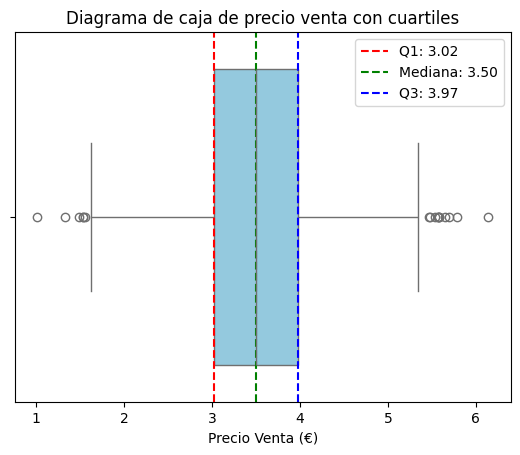

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["precio_venta"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de precio venta con cuartiles')
plt.xlabel('Precio Venta (€)')
plt.legend()

plt.show()

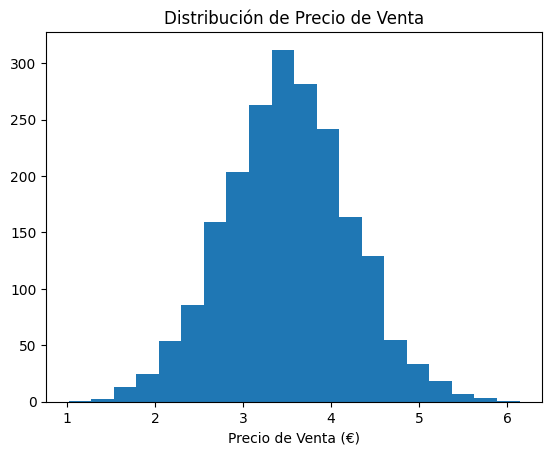

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["precio_venta"].dropna(), bins=20)
plt.title('Distribución de Precio de Venta')
plt.xlabel('Precio de Venta (€)')
plt.ylabel('')
plt.show()

In [ ]:
Q1_pv = df["precio_venta"].quantile(0.25)
Q3_pv = df["precio_venta"].quantile(0.75)
IQR_pv = Q3_pv - Q1_pv
outliers_pv = df[df["precio_venta"] > Q3_pv + 1.5 * IQR_pv]

print("Total outliers:", outliers_pv["precio_venta"].count())
print(Q1_pv)
print(Q3_pv)


Total outliers: 11
3.023559873719671
3.9731626825801287


En precio venta tenemos 11 outliers mientras que en coste inicial teníamos 16.

In [ ]:
outliers_pv_ci = pd.merge(outliers_ci, outliers_pv, on='t_id', how='inner')
outliers_pv_ci

,cliente_x,precio_venta_x,peso_x,t_id,fecha_venta_x,hora_venta_x,tipo_x,fecha_recogida_x,hora_recogida_x,lote_x,...,peso_y,fecha_venta_y,hora_venta_y,tipo_y,fecha_recogida_y,hora_recogida_y,lote_y,marca_y,coste_inicial_y,proveedor_y
0,EcoMercado Sostenible,6.141032,261.085310,Persimmon858.png,2022/09/29,13:00,Persimmon,2022/09/29,03:00,V69B83O77S79T56Q56J80T71,...,261.085310,2022/09/29,13:00,Persimmon,2022/09/29,03:00,V69B83O77S79T56Q56J80T71,FrescuraInigualable,3.388336,AgroSuministros del Campo
1,Cosecha Fresca,5.781931,233.806628,Persimmon848.png,2022/09/20,03:00,Persimmon,2022/09/19,23:00,V69B83O77S79T56P56J80T71,...,233.806628,2022/09/20,03:00,Persimmon,2022/09/19,23:00,V69B83O77S79T56P56J80T71,EncantoNativo,3.290480,Agricultura Inteligente TechCultivos


2 coinciden.

Vamos a comprobar la norma que tenemos que cumplir que desde día de recogida hasta fecha venta tiene que pasar al menos un día.

In [ ]:
df['fecha_venta'] = pd.to_datetime(df['fecha_venta'], errors='coerce')
df['fecha_recogida'] = pd.to_datetime(df['fecha_recogida'], errors='coerce')

tiempo_diferencia = df['fecha_venta'] - df['fecha_recogida']

al_menos_un_dia = (tiempo_diferencia >= pd.Timedelta(days=1)).all()

print(f"Es verdad que desde fecha_recogida y fecha_venta pasa al menos un día? {al_menos_un_dia}")

Es verdad que desde fecha_recogida y fecha_venta pasa al menos un día? False


In [ ]:
tiempo_diferencia.min()

Timedelta('-28 days +00:00:00')

In [ ]:
tiempo_diferencia.sort_values()

,0
238,-28 days
1207,-24 days
1531,-24 days
1686,-22 days
1510,-20 days
...,...
1035,1 days
65,NaT
537,NaT
1226,NaT


Nos encontramos con datos negativos.
Sabemos que no se pueden realizar reservas antes de la recogida por lo que es un error y la norma no se cumple.

**No en todos los productos pasan 24 horas mínimo desde la recogida hasta la venta.**

El peso está en gramos. Vamos a comprobar si a cada proveedor no se le venden más de 100Kg de fruta en un solo día.

In [ ]:
venta_dia = df.groupby(['proveedor', 'fecha_venta'])['peso'].sum()

mayor_100kg = (venta_dia > 100000).any()

print(f"¿Algún proveedor recibe más de 100 kg en un solo día? {mayor_100kg}")

¿Algún proveedor recibe más de 100 kg en un solo día? False


No se le vende más de 100Kg de persimmon a un proveedor en un solo día.

**En el caso de los persimmon esta norma se cumple.**

Vamos a comprobar que 1 lote solo contiene un tipo de fruta y de una sola marca.

In [ ]:
lote_check = df.groupby('lote').agg({
    'tipo': 'nunique',
    'marca': 'nunique'
}).reset_index()

tipo_check = lote_check[lote_check['tipo'] > 1]
marca_check = lote_check[lote_check['marca'] > 1]

if tipo_check.empty and marca_check.empty:
    print("Cada lote solo contiene un tipo de fruta o una marca.")
else:
    print("Norma incumplida:")
    if not tipo_check.empty:
        print("\nLotes con más de un tipo de fruta:")
        display(tipo_check)
    if not marca_check.empty:
        print("\nLotes con más de una marca:")
        display(marca_check)

Cada lote solo contiene un tipo de fruta o una marca.


En un solo lote con las manzanas no encontramos más de un tipo de fruta ni más de una marca.
**Con los Persimmon esta norma se cumple.**

In [ ]:
df = df.dropna(subset=['coste_inicial', 'precio_venta'])
df = df[df['coste_inicial'] != 0]
df['rentabilidad'] = ((df['precio_venta'] - df['coste_inicial']) / df['coste_inicial']) * 100

df_lote = df.groupby('lote', as_index=False)[['coste_inicial', 'precio_venta', 'rentabilidad']].mean()

corr = df_lote[['coste_inicial', 'precio_venta', 'rentabilidad']].corr()
display(corr)

,coste_inicial,precio_venta,rentabilidad
coste_inicial,1.000000,0.720583,-0.597853
precio_venta,0.720583,1.000000,0.011867
rentabilidad,-0.597853,0.011867,1.000000


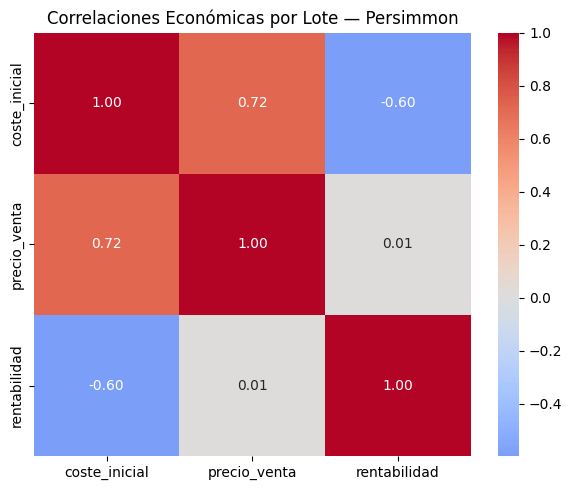

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlaciones Económicas por Lote — Persimmon')
plt.tight_layout()
plt.show()

               precio_venta  coste_inicial      peso
precio_venta       1.000000       0.720583  0.017847
coste_inicial      0.720583       1.000000 -0.005405
peso               0.017847      -0.005405  1.000000


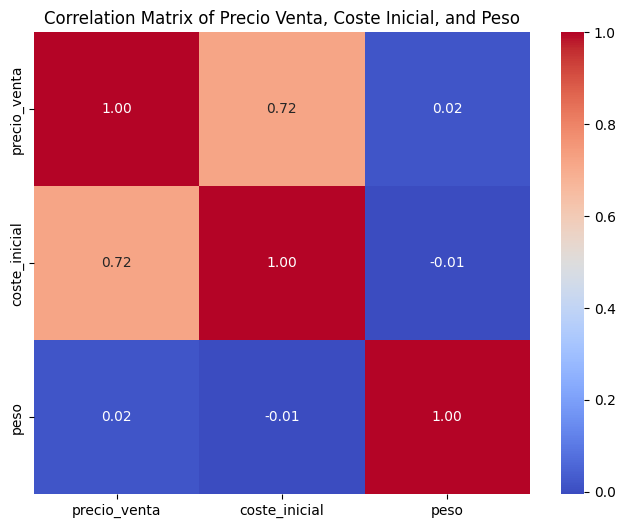

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['precio_venta', 'coste_inicial', 'peso']].corr()

print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Precio Venta, Coste Inicial, and Peso')
plt.show()

Las correlaciones entre coste inicial y precio venta son de 0.72 mientras que no encontramos correlación entre precio venta y peso ni entre coste inicial y peso. Creemos que esto debería estar totalmente relacionado ya que a mayor peso deberia tener un coste o precio mayor. Esto refuerza la teoria que exponemos de que los pesos no son correctos.

Aqui dejamos el analisis de los persimmon y pasamos a analizar la siguiente fruta.